# Project Description

We have a client who has a website where people write different reviews for technical products. 
Now they are adding a new feature to their website i.e. The reviewer will have to add stars(rating) 
as well with the review. The rating is out 5 stars and it only has 5 options available 1 star, 2 stars, 
3 stars, 4 stars, 5 stars. Now they want to predict ratings for the reviews which were written in the 
past and they don’t have a rating. So, we have to build an application which can predict the rating 
by seeing the review.

After collecting the data, you need to build a machine learning model. Before model building do 
all data preprocessing steps involving NLP. Try different models with different hyper parameters 
and select the best model.
Follow the complete life cycle of data science. Include all the steps like -

1. Data Cleaning

2. Exploratory Data Analysis

3. Data Preprocessing

4. Model Building

5. Model Evaluation

6. Selecting the best mode

In [1]:
#!pip install googletrans

### Importing Necessary Libraries

In [242]:
#Import libs
import pandas as pd 
import numpy as np 
import string
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#nltk.download('vader_lexicon')
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [243]:
#Importing data set
df = pd.read_excel('Ratings_Project.xlsx')
df.head()

,Unnamed: 0,Reviews,Ratings
0,0,Best for this price range but camera is ok per...,5
1,1,Good budget phone. Best battery and best perfo...,5
2,2,Nice entry level smartphone.. too good for fam...,5
3,3,Phone is good but camera quality is not so goo...,4
4,4,Very nice mobile in this price Battery perform...,5


Data set consists of two columns -> Reviews & Ratings

In [244]:
# Dataset has extra columns- Remove 
df.drop('Unnamed: 0',axis=1,inplace=True)

In [245]:
#Verifying removed column
df.head()

,Reviews,Ratings
0,Best for this price range but camera is ok per...,5
1,Good budget phone. Best battery and best perfo...,5
2,Nice entry level smartphone.. too good for fam...,5
3,Phone is good but camera quality is not so goo...,4
4,Very nice mobile in this price Battery perform...,5


### Understanding Data

In [246]:
#Shape of data set -> no. of rows and columns in data set
df.shape

(20649, 2)

Data set consists of 20,649 rows and 2 columns

In [247]:
#Displaying no. of values for each Rating
print ('Ratings count','\n',df.Ratings.value_counts())

Ratings count 
 5    8451
1    5243
4    3501
3    1951
2    1503
Name: Ratings, dtype: int64


5    8451
1    5243
4    3501
3    1951
2    1503
Name: Ratings, dtype: int64


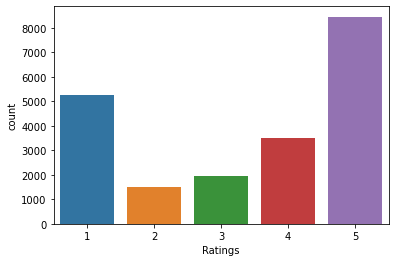

In [248]:
#creating bar plot for each Rating 
ab=sns.countplot(x='Ratings', data=df)
print(df['Ratings'].value_counts())

We have maximum records for 'Rating 5' and 'Rating 1' and least for 'Rating 2' which indicates that the data set is imbalanced in nature.

In [249]:
#Ratio of each Ratings count
print ('1 ratio = ', round(len(df[df['Ratings']==1]) / len(df.Ratings),2)*100,'%')
print ('2 ratio  = ', round(len(df[df['Ratings']==2]) / len(df.Ratings),2)*100,'%')
print ('3 ratio  = ', round(len(df[df['Ratings']==3]) / len(df.Ratings),2)*100,'%')
print ('4 ratio  = ', round(len(df[df['Ratings']==4]) / len(df.Ratings),2)*100,'%')
print ('5 ratio  = ', round(len(df[df['Ratings']==5]) / len(df.Ratings),2)*100,'%')

1 ratio =  25.0 %
2 ratio  =  7.000000000000001 %
3 ratio  =  9.0 %
4 ratio  =  17.0 %
5 ratio  =  41.0 %


We can notice that our data is imbalanced.

In [250]:
#New column for Length of reviews to have the length of original dataframe
df['length'] = df.Reviews.str.len()
df.head(5)

,Reviews,Ratings,length
0,Best for this price range but camera is ok per...,5,195.0
1,Good budget phone. Best battery and best perfo...,5,232.0
2,Nice entry level smartphone.. too good for fam...,5,124.0
3,Phone is good but camera quality is not so goo...,4,124.0
4,Very nice mobile in this price Battery perform...,5,160.0


Hence, we can see the 'Original length' of each Review in the dataframe.

# Pre Processing Of Text

In [251]:
#Removing null values in dataframe in order to avoid errors
df.dropna(inplace=True)

##### Removing Punctuations

In [252]:
# Remove punctuations from data set
df['Reviews'] = df['Reviews'].str.replace(r'[^\w\d\s]', ' ') #removing punctuations
df['Reviews'] = df['Reviews'].str.replace(r'[?:\d+(?:\.\d*)?|\.\d+]', ' ')  #Removing numerical data 
df['Reviews'] = df['Reviews'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',' ') #removing websites
df.head()

,Reviews,Ratings,length
0,Best for this price range but camera is ok per...,5,195.0
1,Good budget phone Best battery and best perfo...,5,232.0
2,Nice entry level smartphone too good for fam...,5,124.0
3,Phone is good but camera quality is not so goo...,4,124.0
4,Very nice mobile in this price Battery perform...,5,160.0


It is observed that the punctuations are removed by making comparisons with the past data sets.

#### Removing Emoticons 

In [253]:
import re
def remove_emoji(string):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F" # emoticons
                           u"\U0001F300-\U0001F5FF" # symbols & pictographs
                           u"\U0001F680-\U0001F6FF" # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF" # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [254]:
df['Reviews'] = df['Reviews'].apply(remove_emoji) 

The emoticons in a text have been removed.

#### Setting our own Stopwords

In [255]:
#Printing standard stopword list provided by nltk.corpus
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [256]:
#Setting our own stop words as per requirements
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd",
              'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers',
              'herself', 'it', "it's", 'its', 'itself','they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
              'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been',
              'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
              'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
              'into', 'through', 'during', 'before', 'after', 'to', 'from', 'up', 'down', 'in', 'out', 'over', 'under', 
              'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both',
              'each','other','such', 'own', 'same', 'so','than','s', 't', 'can', 'will', 'just', 'should', "should've", 
              'now', 'd', 'll', 'm', 'o', 're', 've', 'y','ma','printer','phone','mobile','router','earphone','earphones',
              'headphone','headphones','smartphone','product','home theater','smart watch','laptop','laptops','camera',
              'cameras']


Here, we have created our own list of stopwords as per the use case or task requirement

#### Removing Stopwords & Converting all texts into lower case

In [257]:
#stopwords removal
df['Reviews']=df['Reviews'].apply(lambda words: ' '.join(word.lower() for word in words.split() 
                                                         if word not in stop_words and len(word)>2))

In [258]:
df.head()

,Reviews,Ratings,length
0,best price range performance enough lite use d...,5,195.0
1,good budget best battery best performance came...,5,232.0
2,nice entry level too good family use used ligh...,5,124.0
3,phone good quality not good battery performanc...,4,124.0
4,very nice price battery performance good camer...,5,160.0


By comparing with the old dataframe on the top, we can observe that all the texts in the data set have been converted into lowercase and and the words set in the stopword list is also removed.

#### Removing Extra Spaces

In [259]:
# Replace whitespace between terms with a single space
df['Reviews']= df['Reviews'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df['Reviews'] = df['Reviews'].str.replace(r'^\s+|\s+?$', '')

All the extra spaces in the text have been removed.

#### Tokenization and Lemmatization of Texts

In [260]:
#Filling non letter areas with strimg
import re
letters_only = re.sub("[^a-zA-Z]",  # Search for all non-letters
                          " ",          # Replace all non-letters with spaces
                          str('Reviews'))

In [261]:
#Filling null values as string to avoid Nan values in data
df['Reviews'] = df['Reviews'].fillna('').apply(str)

In [292]:
#Creatinf function to lemmatize words in a text
import nltk

w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w,'v') for w in w_tokenizer.tokenize(text)]

In [293]:
#Applying Lemmatization on the column
df['Reviews'] = df['Reviews'].apply(lemmatize_text)

In [294]:
#The texts have been first converted into tokens and then Lemmatized
df.Reviews

0        [best, price, range, performance, enough, lite...
1        [good, budget, best, battery, best, performanc...
2        [nice, entry, level, too, good, family, use, u...
3        [phone, good, quality, not, good, battery, per...
4        [very, nice, price, battery, performance, good...
5        [good, like, performance, great, display, good...
6        [camera, and, battery, best, perform, super, p...
7        [fully, colourful, display, battery, backup, a...
8        [this, mark, camera, bad, performance, wise, n...
9        [the, very, good, photo, also, very, good, and...
10       [camera, not, good, performance, wise, display...
11       [best, high, end, graphic, game, pubg, availab...
12       [pro, large, battery, last, long, time, lag, d...
13       [more, efficiency, more, power, nice, one, rea...
14                                [best, quality, product]
15                                   [value, money, heavy]
16                                            [mind, blo

In [298]:
#Joinig strings again to apply Vectors to it
df['Reviews'] = df.Reviews.str.join(' ')

In [287]:
#Displaying joint reviews
df.Reviews

0        best price range performance enough lite use d...
1        good budget best battery best performance came...
2        nice entry level too good family use use light...
3        phone good quality not good battery performanc...
4        very nice price battery performance good camer...
5        good like performance great display good dule ...
6        camera and battery best perform super poco bes...
7        fully colourful display battery backup also aw...
8        this mark camera bad performance wise not grea...
9        the very good photo also very good and the bat...
10       camera not good performance wise display good ...
11       best high end graphic game pubg available till...
12       pro large battery last long time lag decent co...
13       more efficiency more power nice one realme bes...
14                                    best quality product
15                                       value money heavy
16                                               mind bl

The lemmas of each and every word in the reviews column have been found

##### Comparing Original & Cleaned text

In [265]:
# New column (clean_length) after puncuations,stopwords removal
df['clean_length'] = df.Reviews.str.len()
df.head()

,Reviews,Ratings,length,clean_length
0,"[best, price, range, performance, enough, lite...",5,195.0,18
1,"[good, budget, best, battery, best, performanc...",5,232.0,23
2,"[nice, entry, level, too, good, family, use, u...",5,124.0,14
3,"[phone, good, quality, not, good, battery, per...",4,124.0,11
4,"[very, nice, price, battery, performance, good...",5,160.0,17


In [266]:
# Total length removal
print ('Origian Length', df.length.sum())
print ('Clean Length', df.clean_length.sum())

Origian Length 2582308.0
Clean Length 267798


We can notice so much of junk data from our data has been removed by pre processing of texts.

### Visualizing Original Length of texts vs Cleaned Length

###### Original Length

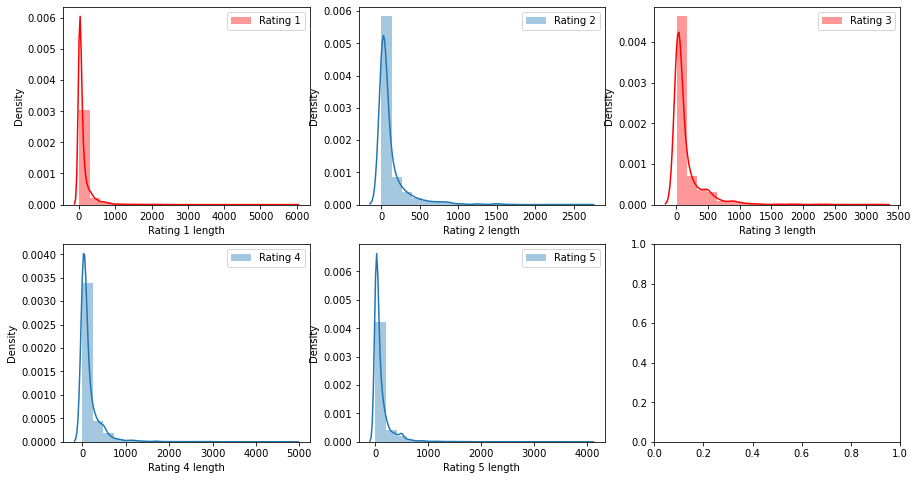

In [267]:
# Message distribution BEFORE cleaning
f,ax = plt.subplots(2,3,figsize = (15,8))

sns.distplot(df[df['Ratings']==1]['length'],bins=20,ax=ax[0,0],label='Rating 1',color='r')
ax[0,0].set_xlabel('Rating 1 length')
ax[0,0].legend()

sns.distplot(df[df['Ratings']==2]['length'],bins=20,ax=ax[0,1],label='Rating 2')
ax[0,1].set_xlabel('Rating 2 length')
ax[0,1].legend()

sns.distplot(df[df['Ratings']==3]['length'],bins=20,ax=ax[0,2],label='Rating 3',color='r')
ax[0,2].set_xlabel('Rating 3 length')
ax[0,2].legend()

sns.distplot(df[df['Ratings']==4]['length'],bins=20,ax=ax[1,0],label='Rating 4')
ax[1,0].set_xlabel('Rating 4 length')
ax[1,0].legend()

sns.distplot(df[df['Ratings']==5]['length'],bins=20,ax=ax[1,1],label='Rating 5')
ax[1,1].set_xlabel('Rating 5 length')
ax[1,1].legend()


plt.show()

The length of original text for each Rating is as follows:

Rating 1 = 6000 texts

Rating 2 = More than 2500 texts

Rating 3 = Around 3500 texts

Rating 4 = 5000 texts 

Rating 5 = More than 4000 texts

##### Cleaned Length

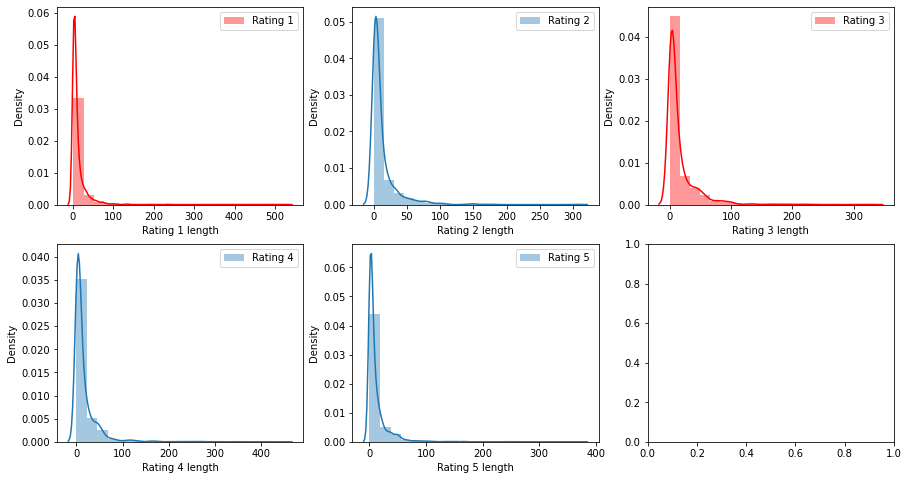

In [268]:
# Message distribution AFTER cleaning
f,ax = plt.subplots(2,3,figsize = (15,8))

sns.distplot(df[df['Ratings']==1]['clean_length'],bins=20,ax=ax[0,0],label='Rating 1',color='r')
ax[0,0].set_xlabel('Rating 1 length')
ax[0,0].legend()

sns.distplot(df[df['Ratings']==2]['clean_length'],bins=20,ax=ax[0,1],label='Rating 2')
ax[0,1].set_xlabel('Rating 2 length')
ax[0,1].legend()

sns.distplot(df[df['Ratings']==3]['clean_length'],bins=20,ax=ax[0,2],label='Rating 3',color='r')
ax[0,2].set_xlabel('Rating 3 length')
ax[0,2].legend()

sns.distplot(df[df['Ratings']==4]['clean_length'],bins=20,ax=ax[1,0],label='Rating 4')
ax[1,0].set_xlabel('Rating 4 length')
ax[1,0].legend()

sns.distplot(df[df['Ratings']==5]['clean_length'],bins=20,ax=ax[1,1],label='Rating 5')
ax[1,1].set_xlabel('Rating 5 length')
ax[1,1].legend()


plt.show()

The length of cleaned text for each Rating is as follows:

Rating 1 = More than500 texts

Rating 2 = More than 300 texts

Rating 3 = More than 300 texts

Rating 4 = More than 400 texts

Rating 5 = Less than 400 texts

In [ ]:
#Getting sense of loud words in spam 
from wordcloud import WordCloud


one = df['Reviews'][df['Reviews']==1]

one_cloud = WordCloud(width=700,height=500,background_color='white',max_words=20).generate(' '.join(one))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(one_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Model Building 

In [303]:
# 1. Convert text into vectors using TF-IDF
# 3. Split feature and label
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

tf_vec = TfidfVectorizer(smooth_idf=False)


features = tf_vec.fit_transform(df['Reviews'])    


x = features
y = df['Ratings']


In [304]:
#Code for finding best random state
mnb=MultinomialNB()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    mnb.fit(x_train,y_train)
    pred_train=mnb.predict(x_train)
    pred_test=mnb.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.5509323938528822
At random state 0, the testing accuracy is: 0.5148202137998056


At random state 1, the training accuracy is: 0.552390208345988
At random state 1, the testing accuracy is: 0.5306122448979592


At random state 2, the training accuracy is: 0.5520257547227115
At random state 2, the testing accuracy is: 0.5131195335276968


At random state 3, the training accuracy is: 0.5530583733219948
At random state 3, the testing accuracy is: 0.5204081632653061


At random state 4, the training accuracy is: 0.5520864969932576
At random state 4, the testing accuracy is: 0.5233236151603499


At random state 5, the training accuracy is: 0.5508716515823362
At random state 5, the testing accuracy is: 0.521865889212828


At random state 6, the training accuracy is: 0.5526331774281723
At random state 6, the testing accuracy is: 0.5157920310981535


At random state 7, the training accuracy is: 0.550750167041244
At random state 7, the testing accur

At random state 67, the testing accuracy is: 0.5167638483965015


At random state 68, the training accuracy is: 0.5511753629350665
At random state 68, the testing accuracy is: 0.5080174927113703


At random state 69, the training accuracy is: 0.5498390329830529
At random state 69, the testing accuracy is: 0.5201652089407192


At random state 70, the training accuracy is: 0.5543339610034623
At random state 70, the testing accuracy is: 0.5199222546161322


At random state 71, the training accuracy is: 0.5501427443357833
At random state 71, the testing accuracy is: 0.5228377065111759


At random state 72, the training accuracy is: 0.5485027030310393
At random state 72, the testing accuracy is: 0.5272108843537415


At random state 73, the training accuracy is: 0.5491101257365
At random state 73, the testing accuracy is: 0.5308551992225462


At random state 74, the training accuracy is: 0.5485634453015854
At random state 74, the testing accuracy is: 0.5155490767735665


At random state 75, 

Best random state selected is 52.

In [305]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=52)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at random state 52. We will use different algorithms for comparing accuracies and attaining the best model. We will compare MultinomialNB, DecisionTreeClassifier, KNeighborsClassifier and RandomForestClassifier in this case.

In [306]:
# 2. Instantiate classifiers
mnb = MultinomialNB()
dt=DecisionTreeClassifier()
kn=KNeighborsClassifier()
rf=RandomForestClassifier()

In [308]:
model=[MultinomialNB(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier()]

In [310]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of MultinomialNB() is:
0.5349854227405247
[[ 622    4    1    1  443]
 [ 105   26    0    1  139]
 [  76    2    0    0  282]
 [  63    1    0   21  622]
 [ 172    0    0    2 1533]]
              precision    recall  f1-score   support

           1       0.60      0.58      0.59      1071
           2       0.79      0.10      0.17       271
           3       0.00      0.00      0.00       360
           4       0.84      0.03      0.06       707
           5       0.51      0.90      0.65      1707

    accuracy                           0.53      4116
   macro avg       0.55      0.32      0.29      4116
weighted avg       0.56      0.53      0.44      4116



Accuracy score of DecisionTreeClassifier() is:
0.4793488824101069
[[ 578   59   54   85  295]
 [ 106   54   23   25   63]
 [  76   22   45   41  176]
 [ 111   23   50  149  374]
 [ 229   41   88  202 1147]]
              precision    recall  f1-score   support

           1       0.53      0.54      0.53      

We get an accuracy of 53.49% in  MultinomialNB, 47.93% Decision Tree, 43.73% KNeighbors Classifiers and 54.93% for RandomForestClassifier() . But looking at the accuracy and other metrics such as precision, recall and f1 score, the model is not performing well because of the imbalanced nature of the data set. However, we cannot use sampling techniques to overcome this issue in case of NLP problems as Sample techniques in nlp can distort the data. Hence, we can overcome this issue only by collecting more data in a form that the data set is balanced. We'll still try to hyper parameter tune the model at which we achieved the best accuracy and try increasing the accuracy. In this case, we have achieved maximum accuracy for RandomForestClassifier.

# Hyper Parameter Tuning

In [311]:
#Importing Libarary for Hyper Parameter Tuning SearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [313]:
#Finding best parameters
parameters={"criterion":["gini","entropy"],"max_features":["auto","sqrt"],"max_depth":np.arange(1, 28, 1)}
cv=KFold(n_splits=5,random_state=None,shuffle=False)
clf=GridSearchCV(rf,parameters,cv=cv,scoring='accuracy')
clf.fit(x_train,y_train)

print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 27, 'max_features': 'sqrt'}


In [315]:
#Predicting results
y_pred=clf.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 439    0    0    1  631]
 [  76   32    0    0  163]
 [  52    0   11    0  297]
 [  36    0    0   50  621]
 [  93    0    0    1 1613]]
0.5211370262390671
              precision    recall  f1-score   support

           1       0.63      0.41      0.50      1071
           2       1.00      0.12      0.21       271
           3       1.00      0.03      0.06       360
           4       0.96      0.07      0.13       707
           5       0.49      0.94      0.64      1707

    accuracy                           0.52      4116
   macro avg       0.82      0.31      0.31      4116
weighted avg       0.68      0.52      0.44      4116



Since, the accuracy is obtained more prior hyper tuning the RandomForestClassifier() model. Hence, we select Random Forest Classifier (before hypertuning) as our model.

# Saving the Best Model

In [316]:
#Saving the best model
import pickle
filename='Reviews_ratings_nlp.pkl'
pickle.dump(rf,open(filename,'wb'))